# Introduction to Time Series Analysis

###  2024 created by Yan Ge, Yang Yang

In this Notebook, we will focus on:1) Time-series data visualisation; 2) Time-series data wrangling; 3) Imputation for missing time-series data.
Part of this tutorial uses following source as reference: 1). https://github.com/maalvarezl/MLAI; 2) https://github.com/Apress/hands-on-time-series-analylsis-python

# Time-Series Data Knowledge Check

1. What is not a component of time seiries?\
A. Trend\
B. Random\
C. Cross-sectional pattern\
D. Cyclical patterns

Answer: C


3. Briefly describe the difference between Cross-sectional data and Time series data.\
Answer: Time-series data is a set of observations collected over intervals of time. It tracks a single entity's (for single variant time series) change over time. Cross-sectional data captures information at a single point in time. It's like a snapshot that provides a view of multiple entries at the same moment.\

4. Briefly describe the difference between Cyclical pattern and Seasonality.


Answer: Cyclical patterns refer to fluctuations in data that occur over longer periods, typically over more than one year. These cycles are not of a fixed duration and can vary in length, hard to predict. Seasonal patterns are observed as regular fluctuations that occur within a fixed period, typically within a single year. Seasonality is highly predictable with a fixed frequency. .


# Handling Time-Series Missing Data

In [6]:
 # Question 1: import the data file 'AAPL_null.csv' and check how many missing data in the dataframe
import numpy as np
import pandas as pd
df_initial = pd.read_csv('AAPL_null.csv',index_col =0,
                parse_dates=['Date'], dayfirst=True)
print(df_initial)

                  Open        High         Low       Close
Date                                                      
2020-12-28  133.990005  137.339996  133.509995  136.690002
2020-12-29  138.050003  138.789993  134.339996  134.869995
2020-12-30         NaN  135.990005  133.399994  133.720001
2020-12-31  134.080002  134.740005  131.720001  132.690002
2021-01-04  133.520004  133.610001  126.760002  129.410004
...                ...         ...         ...         ...
2021-12-20  168.279999  170.580002  167.460007  169.750000
2021-12-21  171.559998  173.199997  169.119995  172.990005
2021-12-22  173.039993  175.860001  172.149994  175.639999
2021-12-23         NaN  176.850006  175.270004  176.279999
2021-12-27  177.085007  179.368896  177.089996  179.242996

[252 rows x 4 columns]


In [7]:
# check the data structure as well as non-null values
df_initial.isnull().sum()  
# You can also use df_initial.info()   for how many null values

Open     17
High      1
Low       2
Close    18
dtype: int64

In [8]:
# Question 2 using   blackfill- bfill()  , frontfill-  ffill(),  fixvalue fill -fillna() or delete  -dropna()  to deal the missing data

df_initial.bfill().Close

Date
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
2021-01-04    129.410004
                 ...    
2021-12-20    169.750000
2021-12-21    172.990005
2021-12-22    175.639999
2021-12-23    176.279999
2021-12-27    179.242996
Name: Close, Length: 252, dtype: float64

In [9]:
df_initial.ffill()

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,138.050003,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004
...,...,...,...,...
2021-12-20,168.279999,170.580002,167.460007,169.750000
2021-12-21,171.559998,173.199997,169.119995,172.990005
2021-12-22,173.039993,175.860001,172.149994,175.639999


In [10]:
df_initial.fillna(np.mean(df_initial.Close))

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,146.876936,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004
...,...,...,...,...
2021-12-20,168.279999,170.580002,167.460007,169.750000
2021-12-21,171.559998,173.199997,169.119995,172.990005
2021-12-22,173.039993,175.860001,172.149994,175.639999


In [11]:
df_initial.dropna()

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004
2021-01-05,128.889999,131.740005,128.429993,131.009995
...,...,...,...,...
2021-12-17,169.929993,173.470001,169.690002,171.139999
2021-12-20,168.279999,170.580002,167.460007,169.750000
2021-12-21,171.559998,173.199997,169.119995,172.990005


In [12]:
# Question 3 : Please use KNN as a imputer to handle missing values (Hint: KNNImputer() in sklearn)
# Transform the KNN filled result into a dataframe called 'df_filled' with original index and column name ('Date', 'Open','High','Low','Close')
# Save the file just in case.

import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
knnimp_df = imputer.fit_transform(df_initial)
print(knnimp_df)

[[133.990005   137.339996   133.509995   136.690002  ]
 [138.050003   138.789993   134.339996   134.869995  ]
 [134.91999833 135.990005   133.399994   133.720001  ]
 ...
 [173.039993   175.860001   172.149994   175.639999  ]
 [174.399999   176.850006   175.270004   176.279999  ]
 [177.085007   179.368896   177.089996   179.242996  ]]


In [13]:
# The result of KNN imputer is an array, convert the imputed data array back into a DataFrame, save the results
df_filled= pd.DataFrame(knnimp_df, columns=df_initial.columns, index=df_initial.index)
df_filled.to_csv('AAPL_filled.csv')

# Time-Series Data Wrangling

Data: In this tutorial, we will use df from last section to do some data wrangling

In [14]:
#Load the data from your previous saved file, or the provided 'AAPL.csv' , show the first 5 rows 
df=pd.read_csv('AAPL_filled.csv')
df.head()

,Date,Open,High,Low,Close
0,2020-12-28,133.990005,137.339996,133.509995,136.690002
1,2020-12-29,138.050003,138.789993,134.339996,134.869995
2,2020-12-30,134.919998,135.990005,133.399994,133.720001
3,2020-12-31,134.080002,134.740005,131.720001,132.690002
4,2021-01-04,133.520004,133.610001,126.760002,129.410004


In [15]:
# As you can see the index of df is 0,1,2,3,4.... if we just use df=pd.read_csv('AAPL_filled.csv')
# Quewstion 4: try to use 'parse_dates' , 'index_col' to parse the 'Date' column into dates and use it as the index. 

df=pd.read_csv('AAPL_filled.csv', parse_dates=['Date'], index_col=['Date'])
df

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,134.919998,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004
...,...,...,...,...
2021-12-20,168.279999,170.580002,167.460007,169.750000
2021-12-21,171.559998,173.199997,169.119995,172.990005
2021-12-22,173.039993,175.860001,172.149994,175.639999


In [16]:
# Now lets do some Extraction and resampling

# Q 5.1 extract all data in August 2021

df.loc['08/2021']

,Open,High,Low,Close
Date,,,,
2021-08-02,146.360001,146.949997,145.250000,145.520004
2021-08-03,145.809998,148.039993,145.179993,147.360001
2021-08-04,147.270004,147.789993,146.279999,146.949997
2021-08-05,146.979996,147.839996,146.169998,147.059998
2021-08-06,146.350006,147.110001,145.630005,146.139999
2021-08-09,146.199997,146.699997,145.520004,146.089996
2021-08-10,146.440002,147.710007,145.300003,145.600006
2021-08-11,146.303335,146.720001,145.529999,145.860001
2021-08-12,146.190002,149.050003,145.839996,148.889999


In [17]:
# Q 5.2 extract all close prices in August 2021 and calculate mean and median  of the close price in August 2021.

df.loc['08/2021'].Close

Date
2021-08-02    145.520004
2021-08-03    147.360001
2021-08-04    146.949997
2021-08-05    147.059998
2021-08-06    146.139999
2021-08-09    146.089996
2021-08-10    145.600006
2021-08-11    145.860001
2021-08-12    148.889999
2021-08-13    149.100006
2021-08-16    151.119995
2021-08-17    150.190002
2021-08-18    146.360001
2021-08-19    146.699997
2021-08-20    148.190002
2021-08-23    149.710007
2021-08-24    149.619995
2021-08-25    148.360001
2021-08-26    147.539993
2021-08-27    148.600006
2021-08-30    153.119995
2021-08-31    151.830002
Name: Close, dtype: float64

In [18]:
# calculate the mean value of the close price in August 2021.
df.loc['08/2021'].Close.mean()

148.17772740909092

In [19]:
# calculate the median value of the close price in August 2021.
df.loc['08/2021'].Close.median()

147.86499750000002

In [20]:
# Q 5.3 extract all prices from 20 May 2021 to 09 September 2021
df.sort_index().loc['20/05/2021':'09/09/2021',:]

,Open,High,Low,Close
Date,,,,
2021-05-20,125.230003,127.720001,125.099998,127.309998
2021-05-21,127.820000,128.000000,125.209999,125.430000
2021-05-24,126.010002,127.940002,125.940002,127.099998
2021-05-25,127.820000,128.320007,126.320000,126.900002
2021-05-26,126.959999,127.389999,126.419998,126.849998
...,...,...,...,...
2021-09-02,153.869995,154.720001,152.399994,153.649994
2021-09-03,153.759995,154.630005,153.089996,154.300003
2021-09-07,154.970001,157.259995,154.389999,156.690002


In [21]:
# Q.6 Resampling the data on weekly, monthly, quarterly frequency
df.Close.resample("W").mean()

Date
2021-01-03    134.492500
2021-01-10    130.076000
2021-01-17    128.944000
2021-01-24    133.950001
2021-01-31    139.438001
2021-02-07    135.444000
2021-02-14    135.762000
2021-02-21    130.902500
2021-02-28    123.892000
2021-03-07    123.303999
2021-03-14    120.084000
2021-03-21    122.967999
2021-03-28    121.563998
2021-04-04    121.610001
2021-04-11    128.674001
2021-04-18    133.235999
2021-04-25    133.714665
2021-05-02    134.408000
2021-05-09    130.366001
2021-05-16    125.589999
2021-05-23    125.709999
2021-05-30    126.148000
2021-06-06    124.692499
2021-06-13    126.645999
2021-06-20    130.503998
2021-06-27    133.541332
2021-07-04    137.060004
2021-07-11    143.735004
2021-07-18    146.831998
2021-07-25    145.871997
2021-08-01    146.448001
2021-08-08    146.606000
2021-08-15    147.108002
2021-08-22    148.511999
2021-08-29    148.766000
2021-09-05    153.081998
2021-09-12    153.710003
2021-09-19    148.309998
2021-09-26    145.194000
2021-10-03    142.85

In [22]:
# Resample the data to a quarterly frequency

df.resample('Q').mean()

,Open,High,Low,Close
Date,,,,
2020-12-31,135.260002,136.715000,133.242497,134.492500
2021-03-31,128.553607,130.072952,126.749727,128.364426
2021-06-30,129.451535,130.604551,128.396825,129.722698
2021-09-30,147.094220,148.502657,145.889270,147.222969
2021-12-31,155.985195,158.026315,154.715333,180.047384


# Time-Series Data Visualisation

<Axes: xlabel='Date'>

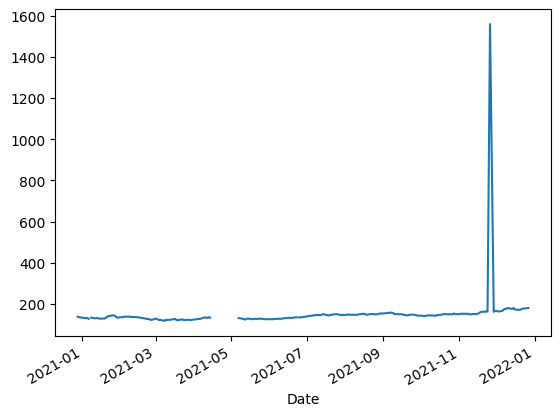

In [23]:
# Q7 Use Matplotlib to plot the close price of the raw data (AAPL_null.csv)
%matplotlib inline
df_initial.Close.plot()

<Axes: xlabel='Date'>

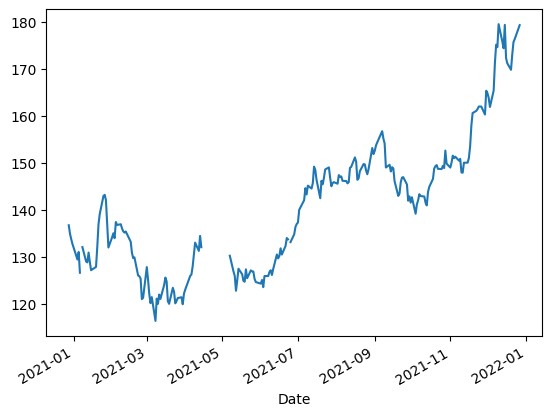

In [24]:
#Q 7.1 What can you see from the plot? How to deal with it?

# From visual inspection, we can see there is an anormaly point in the Close price of AAPL, with value above 1000.
# Let's remove it with the value in front (or other values you see fit) 
df_initial.loc[df_initial['Close'] > 1000, 'Close'] = df_initial['Close'].shift(1)
df_initial.Close.plot()

<Axes: xlabel='Date'>

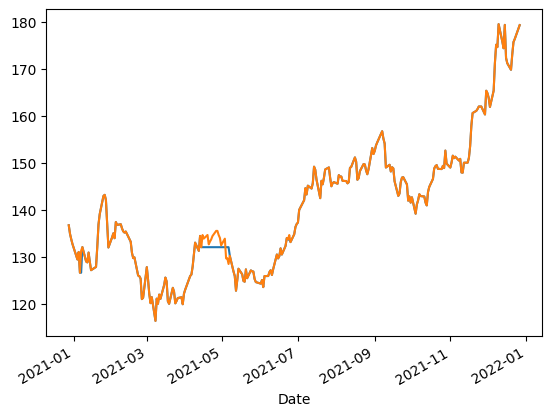

In [25]:
# Q. 8  Plot the close price of the the front filled data and the KNN filled data
%matplotlib inline

# We need to remove the anormaly from the KNN filled data too.
df.loc[df['Close'] > 1000, 'Close'] = df['Close'].shift(1)

df_initial.ffill().Close.plot()
df.Close.plot()

# You can see the difference between front fill and KNN fill

<Axes: xlabel='Date'>

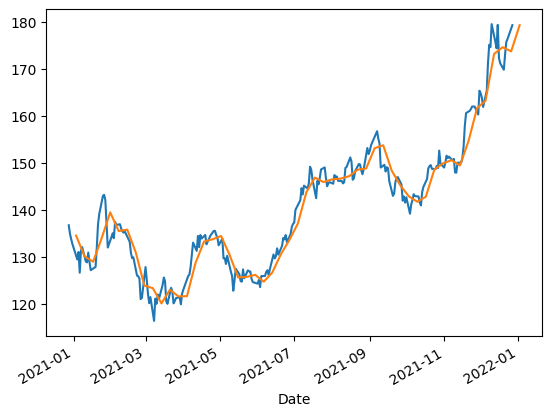

In [26]:
# Q. 8  Plot the close price of the KNN filled data and a weekly resample
%matplotlib inline
df.Close.plot()
df.Close.resample("w").mean().plot()


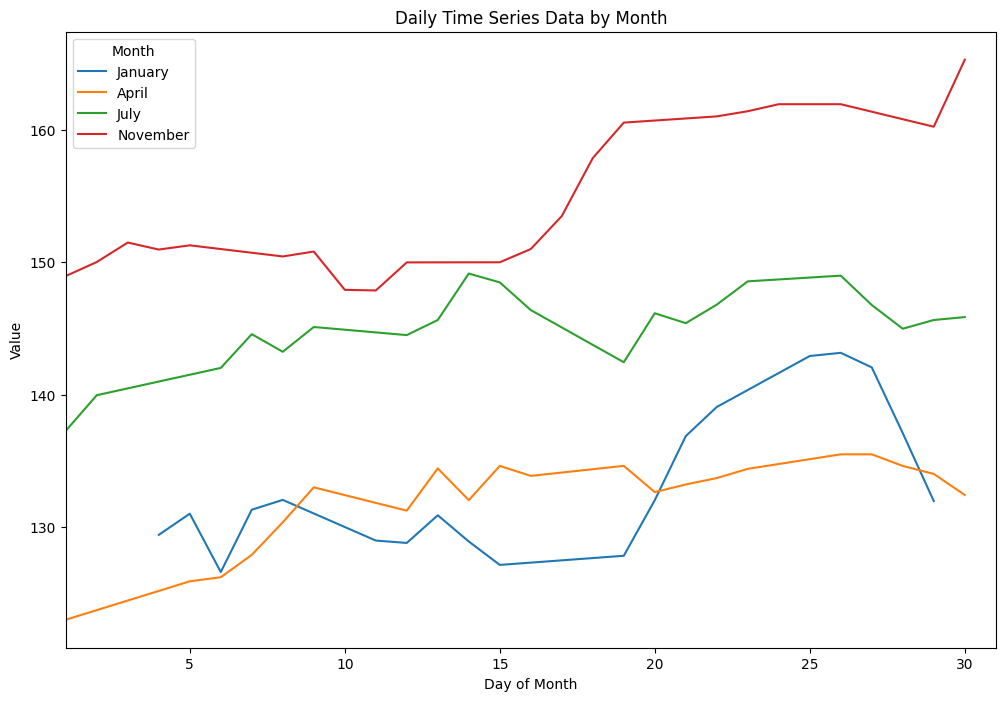

In [27]:
#Q.9 Separate the data by month and then plot the daily values for January, April, July, November on a single 2D chart.  
# The x-axis of this chart should range from 1 to 31, representing the days of the month. 
# Each month's data should be plotted on this common day-scale axis so that I can directly compare day-to-day trends across different months. 

import pandas as pd
import matplotlib.pyplot as plt


# Create a single plot
plt.figure(figsize=(12, 8))

# Get the unique months in the DataFrame
unique_months = [1,4,7,11]

# Plot data for each month
for month in unique_months:
    # Filter data for the specific month
    month_data = df[df.index.month == month]

    # Plot using day of the month as x-axis
    plt.plot(month_data.index.day, month_data['Close'], label=pd.to_datetime(month, format='%m').strftime('%B'))

# Add legend, labels, and title
plt.legend(title='Month')
plt.xlabel('Day of Month')
plt.ylabel('Value')
plt.title('Daily Time Series Data by Month')

# Set x-axis limits to range from 1 to 31
plt.xlim(1, 31)

# Show plot
plt.show()


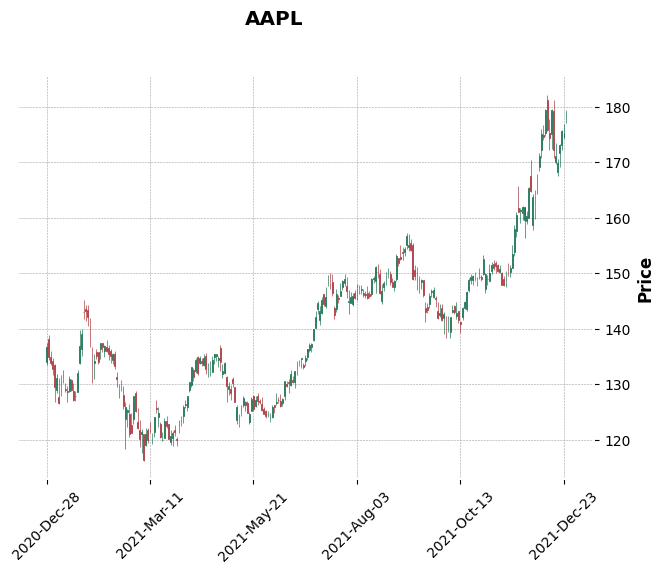

In [29]:
# Q.10 Use mplfinance to plot the price candle chart


import mplfinance as mpf

mpf.plot(df, type='candle', style='charles',
         title='AAPL',
         ylabel='Price')
